In [3]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
# Use Absloute Path to avoid File Not Found Error
file_path = "/Users/50357691/Desktop/Job_Skill_Gap_Analysis/LinkedIn_NER_demo.csv"
df = pd.read_csv(file_path)

# The CS_Terms column contains string representations of lists, so we need to convert them back to lists
def parse_terms(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else []
    except Exception:
        return []

# Acquire the frequency of each CS terms, and sort them in descending order
all_terms = df["CS_Terms"].apply(parse_terms).sum()
term_freq = Counter([term.lower() for term in all_terms])

term_freq_df = pd.DataFrame(term_freq.items(), columns=["CS_Term", "Frequency"]).sort_values(by="Frequency", ascending=False)

term_freq_df.head()



,CS_Term,Frequency
5,data,10
2,computer,7
3,computer science,7
10,python,5
6,data science,4


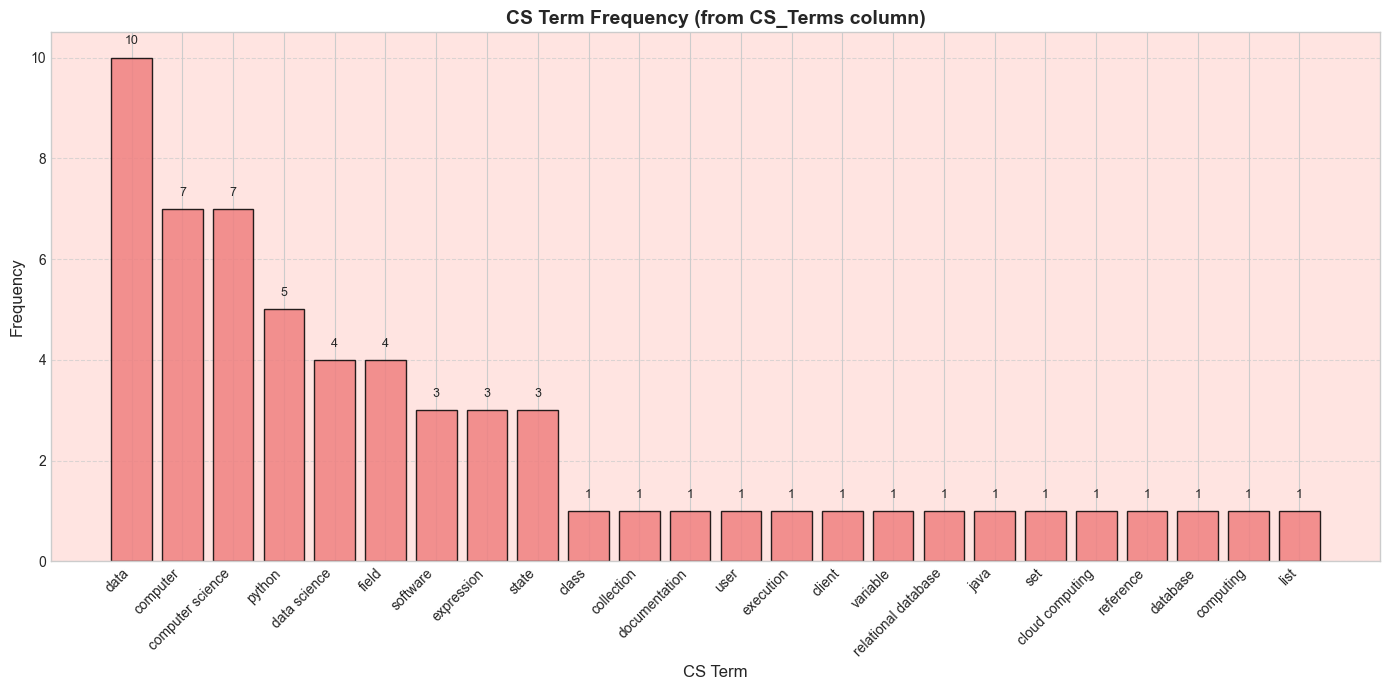

In [15]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(14, 7))

bars = plt.bar(
    term_freq_df["CS_Term"],
    term_freq_df["Frequency"],
    color="lightcoral",   # soft pink/red tone
    edgecolor="black",
    alpha=0.85
)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.2,
        int(yval),
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("CS Term Frequency (from CS_Terms column)", fontsize=14, weight="bold")
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("CS Term", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.gca().set_facecolor("mistyrose")  # light pink background

plt.tight_layout()
plt.show()